In [11]:
# Codind Samurai Internship Report
# Intern: AYUSH SAXENA
# Ref : C.ID-CSIP4056
# Project:Sentiment Analysis on Social Media Data
# Tools: Python, Pandas, Seaborn, Matplotlib, NLTK, TextBlob, WordCloud
# Platform: Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from textblob import TextBlob

# For text processing
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load data
df = pd.read_csv("C:/Users/Ayush/Desktop/CODING SAMURAI INTERNSHIP/Project 2 (Sentiment Analysis on Social Media Data)/Tweets.csv")
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
#EDA and Data Cleaning

# 1) Overview and Null Values

print(df.info())
print(df.isnull().sum())
print(df['airline_sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

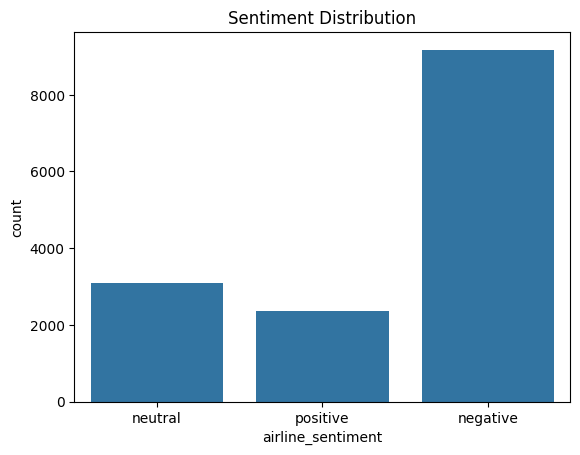

In [3]:
# 2) Visualize Sentiment Distribution

sns.countplot(x='airline_sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [4]:
# 3) Text Cleaning
#Convert text to lowercase
#Remove punctuation, numbers, URLs, stopwords
#Tokenization (split sentences into words)

import re
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)      # remove urls
    text = re.sub(r'@\w+', '', text)         # remove @mentions
    text = re.sub(r'#\w+', '', text)         # remove hashtags
    text = re.sub(r'[^a-zA-Z ]', '', text)   # remove numbers & punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)


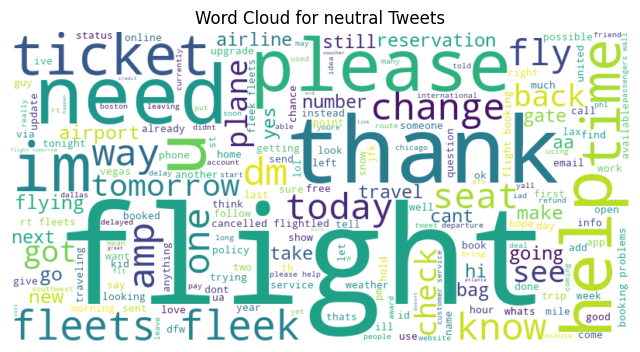

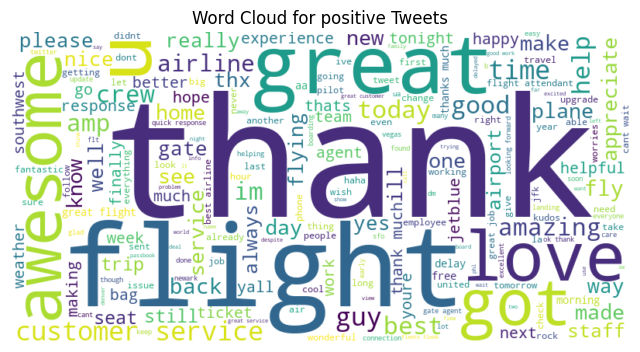

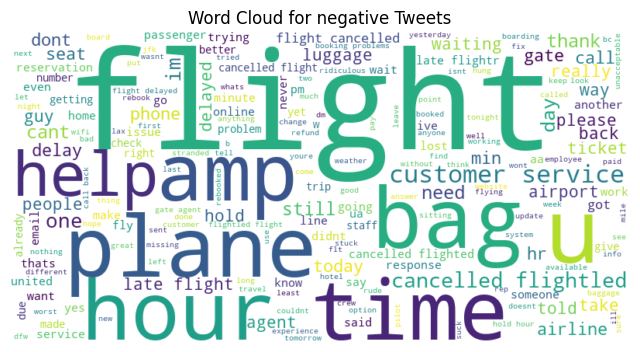

In [6]:
#Visualize Words by Sentiment

# Word Cloud for Each Sentiment

for sentiment in df['airline_sentiment'].unique():
    plt.figure(figsize=(8,6))
    text = ' '.join(df[df['airline_sentiment']==sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()


In [8]:
#Sentiment Analysis Using TextBlob

# 1)Add Polarity & Subjectivity Scores

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['polarity'] = df['clean_text'].apply(get_sentiment)


In [9]:
# 2) Compare with Labeled Sentiment


def polarity_to_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['polarity'].apply(polarity_to_sentiment)



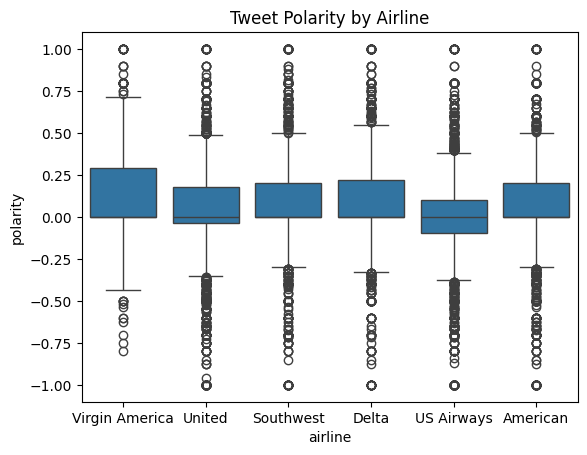

In [10]:
# Visualize Insights
# Show average polarity by airline, or other interesting patterns.


sns.boxplot(x='airline', y='polarity', data=df)
plt.title('Tweet Polarity by Airline')
plt.show()

In [ ]:
## Summary of Findings

#- Negative sentiment dominates Twitter conversations about airlines, indicating customers are more likely to tweet complaints than praise.
#- The most common negative words are related to delays and poor customer service.
#- United Airlines and American Airlines receive the most negative feedback, while Virgin America stands out for positive mentions.
#- Our TextBlob-based sentiment classifier matches the labeled sentiment about 65% of the time, but struggles with neutral and sarcastic tweets.
#- For airlines, focusing on improving real-time issue resolution and customer service could reduce negative social media mentions.
